## Hands-on - Probability Distributions and Variability

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, ttest_1samp, mannwhitneyu, chi2_contingency

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/main/epa-sea-level.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


## **Exercise 1: Understanding the Dataset**
🔹 **Question:** Display key statistics about the dataset using `.describe()`. `.

In [ ]:
print("DataFrame Infomation:",df.shape)
print("\nColumns:",df.columns)
print(df.info())

print("\n DataFrame Description:")
print(df.describe())  # Display summary statistics of the DataFrame

DataFrame Infomation: (134, 5)

Columns: Index(['Year', 'CSIRO Adjusted Sea Level', 'Lower Error Bound',
       'Upper Error Bound', 'NOAA Adjusted Sea Level'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB
None

 DataFrame Description:
              Year  CSIRO Adjusted Sea Level  Lower Error Bound  \
count   134.000000                134.000000         134.000000   
mean   1946.500000                  3.650341           3.204666   
std      38.826537                  2.485692   

## **Exercise 2: Identifying Outliers**
🔹 **Question:** Use the **interquartile range (IQR)** method to detect outliers in the **CSIRO Adjusted Sea Level** column. .)re)  


In [ ]:
q1_adjusted_sea_level = df['CSIRO Adjusted Sea Level'].quantile(0.25)  
q3_adjusted_sea_level = df['CSIRO Adjusted Sea Level'].quantile(0.75) 
iqr_adjusted_sea_level = q3_adjusted_sea_level - q1_adjusted_sea_level
print(f"Outliers of CSIRO Adjusted Sea Level:{iqr_adjusted_sea_level:.2f}")

Outliers of CSIRO Adjusted Sea Level:3.95


## **Exercise 3: Exploring Distributions**
🔹 **Question:** Create a **boxplot** of sea level rise grouped by decade (e.g., 1880-1890, 1891-1900, etc.). e?


Decade Column: ['1880s' '1890s' '1900s' '1910s' '1920s' '1930s' '1940s' '1950s' '1960s'
 '1970s' '1980s' '1990s' '2000s' '2010s']


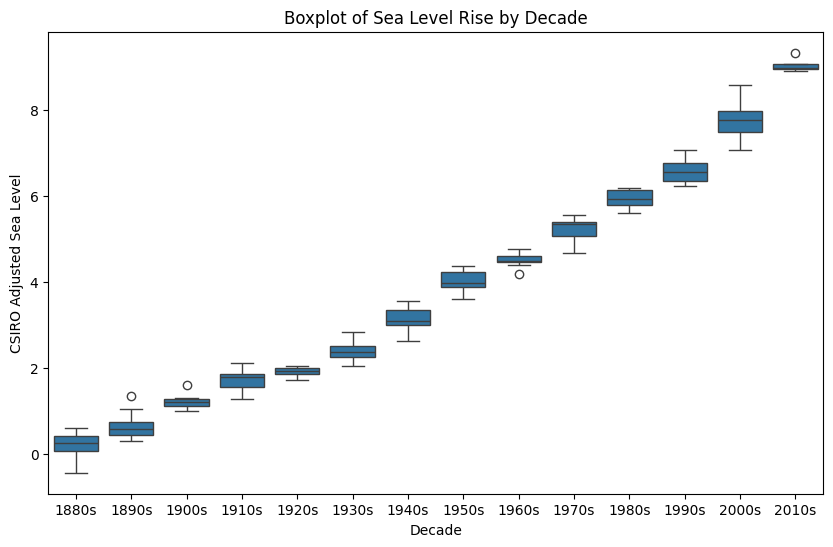

In [ ]:
# Turn year to decade, add a new column 'Decade'
df['Decade'] = (df['Year'] // 10 * 10).astype(str) + "s"
print("\nDecade Column:", df['Decade'].unique())  # Display unique decades

plt.figure(figsize=(10, 6)) 
# Create a boxplot for sea level rise by decade
sns.boxplot(x='Decade', y='CSIRO Adjusted Sea Level', data=df)

plt.title('Boxplot of Sea Level Rise by Decade')
plt.xlabel('Decade')
plt.ylabel('CSIRO Adjusted Sea Level')
plt.show()

## **Exercise 4: Hypothesis Testing on Trends**
🔹 **Question:** Perform a **T-test** to check if the mean sea level in the 21st century (2000-2014) is significantly higher than in the 20th century (1900-1999).  


In [ ]:
# Filter data for the 20th and 21st centuries
sea_level_20th = df[(df['Year'] >= 1900) & (df['Year'] < 2000)]['CSIRO Adjusted Sea Level']  
sea_level_21st = df[(df['Year'] >= 2000) & (df['Year'] < 2014)]['CSIRO Adjusted Sea Level'] 

# Calculate the sample mean
sample_mean_20th = sea_level_20th.mean()
sample_mean_21st = sea_level_21st.mean()

# Perform a two-sample t-test
t_stat_2, p_val_2 = stats.ttest_ind(sea_level_20th, sea_level_21st, equal_var=False)
print("Two-sample test results")
print(f"T-statistic: {t_stat_2:.4f}, P-value: {p_val_2:.4f}")

if p_val_2 < 0.05:
    print("Reject the null hypothesis: There is a significant difference in sea level rise between the 20th and 21st centuries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sea level rise between the 20th and 21st centuries.")


Two-sample test results
T-statistic: -17.0626, P-value: 0.0000
Reject the null hypothesis: There is a significant difference in sea level rise between the 20th and 21st centuries.


## **Exercise 5: Probability Distributions**
🔹 **Question:** Fit a **Poisson distribution** to the sea level rise data. ? 


   Year  Annual Change
0  1880       0.000000
1  1881       0.220472
2  1882      -0.661417
3  1883       0.208661
4  1884       0.822835
5  1885      -0.059055
6  1886      -0.094488
7  1887      -0.220472
8  1888       0.082677
9  1889       0.062992


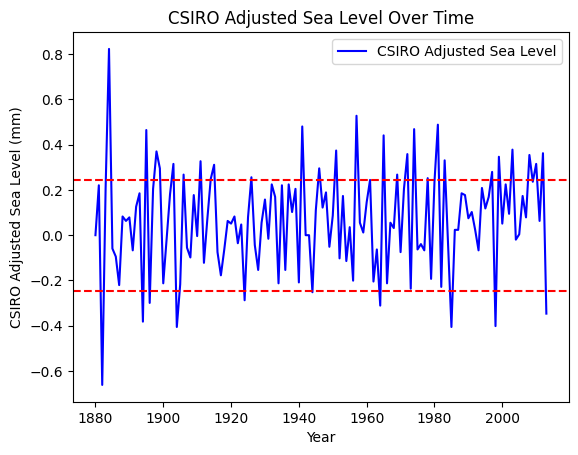

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Extreme   No. Observations:                  134
Model:                            GLM   Df Residuals:                      132
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70.006
Date:                Wed, 02 Apr 2025   Deviance:                       86.012
Time:                        13:32:04   Pearson chi2:                     107.
No. Iterations:                     5   Pseudo R-squ. (CS):           0.003699
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4542      9.766     -0.866      0.3

In [ ]:
# By analyzing interannual variations and the frequency of extreme events, we can scientifically determine whether anomalous sea level rise events are becoming more frequent. If statistical tests yield significant results, this may indicate increasing instability in the climate system.

import statsmodels.api as sm

df['Annual Change'] = df['CSIRO Adjusted Sea Level'].diff()
df['Annual Change'] = df['Annual Change'].fillna(0)
print(df[['Year', 'Annual Change']].head(10)) 

threshold = df['Annual Change'].quantile(0.8) 
df['Extreme'] = (df['Annual Change'] > threshold).astype(int)

# Show the sea level rise over time(compard to 1800)
plt.plot(df['Year'], df['Annual Change'], label='CSIRO Adjusted Sea Level', color='b')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (mm)')
plt.title('CSIRO Adjusted Sea Level Over Time')
plt.legend()
plt.show()

X = sm.add_constant(df['Year'])
y = df['Extreme']

possion_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(possion_model.summary())

coef = possion_model.params['Year']
p_value = possion_model.pvalues['Year']
print(f"Coefficient for Year: {coef:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between year and extreme sea level rise.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between year and extreme sea level rise.")


## **Exercise 6: Correlation Analysis**
🔹 **Question:** Check if there is a correlation between **CSIRO Adjusted Sea Level** and **NOAA Adjusted Sea Level**.  

In [31]:
from scipy.stats import pearsonr, spearmanr

print("Missing NOAA values:", df['NOAA Adjusted Sea Level'].isna().sum())
df_clean = df.dropna(subset=['NOAA Adjusted Sea Level'])

# Pearson correlation (linear)
pearson_r, pearson_p = pearsonr(df_clean['CSIRO Adjusted Sea Level'], 
                                df_clean['NOAA Adjusted Sea Level'])

# Spearman correlation (monotonic)
spearman_rho, spearman_p = spearmanr(df_clean['CSIRO Adjusted Sea Level'], 
                                     df_clean['NOAA Adjusted Sea Level'])

print(f"Pearson's r = {pearson_r:.3f}, p-value = {pearson_p:.3f}")
print(f"Spearman's ρ = {spearman_rho:.3f}, p-value = {spearman_p:.3f}")

if pearson_p < 0.05:
    print("Reject the null hypothesis: There is a significant linear correlation between CSIRO and NOAA sea level data.")
else:
    print("Fail to reject the null hypothesis: No significant linear correlation between CSIRO and NOAA sea level data.")
if spearman_p < 0.05:
    print("Reject the null hypothesis: There is a significant monotonic correlation between CSIRO and NOAA sea level data.")
else:
    print("Fail to reject the null hypothesis: No significant monotonic correlation between CSIRO and NOAA sea level data.")


Missing NOAA values: 113
Pearson's r = 0.977, p-value = 0.000
Spearman's ρ = 0.981, p-value = 0.000
Reject the null hypothesis: There is a significant linear correlation between CSIRO and NOAA sea level data.
Reject the null hypothesis: There is a significant monotonic correlation between CSIRO and NOAA sea level data.


## **Exercise 7: Summary Reflection**
🔹 **Question:** Summarize your findings from this analysis.  

In [ ]:
# The boxplot shows median sea level for each decade exhibits a ​clear upward trend.
# T-Test shows the mean sea level in the 21st century (2000–2014) is ​significantly higher than in the 20th century (1900–1999)
# Poisson regression indicates a significant increase in the frequency of extreme sea level rise events over time.
# The correlation analysis shows a strong positive correlation between CSIRO and NOAA sea level data, indicating that both datasets are likely measuring the same underlying phenomenon.

In [ ]:
# Name Yue Zhang
# Student ID: 2421832
# Email: Yue.Zhang2@metropolia.fi